# Two adjacent vertices and their combined neighbourhoods

Suppose there exists a Conway-99 graph G, that is, an SRG(99,14,1,2). Let a and b be vertices of G such that a and b are neighbours. Then:
* a has 14 neighbours, one of which is b
* b has 14 neighbours, one of which is a
* By lambda = 1, precisely one of these neighbours is a mutual neighbour of both a and b

Thus the graph G' on a,b and their neighbours consists of 27 vertices (a, b, their mutual neighbour, 12 neighbours of a but not b, and 12 neighbours of b but not a). In this workbook, we determine (up to isomorphism) the possibilities for this graph induced by the lambda = 1, mu = 2 constraints on G. 

For convenience, we fix a numbering:
* a is vertex 0
* b is vertex 1
* Their mutual neighbour is vertex 2
* The remaining neighbours of vertex a are vertices 3 through 14
* The remaining neighbours of vertex b are vertices 15 through 26

Moreover, we introduce these vertices sequentially using the 'fanblade' structures centred at vertices 0 and 1:
* For i,j in 1...14 we have i,j adjacent iff j = i + 1 and i is odd
* For i,j in 15...26 we have i,j adjacent iff j = i + 1 and i is odd
* (The seventh blade for vertex 1 consists of vertices 0 and 2)

Finally, we note that each of the vertices i = 15...26 is not adjacent to vertex 0, thus (by mu = 2) there must be two mutual neighbours of 0,i in G. But as all neighbours of 0 are in G', namely vertices 1...14, we know that each vertex i = 15...26 is adjacent to precisely 2 of the vertices 1...14.

* By assumption, vertex 1 is adjacent to vertex i
* Hence vertex 2 is not adjacent to vertex i (else 0 and i and are mutual neighbours of adjacent vertices 1 and 2, which violates lambda = 1)
* So for each i = 15...26 there is a unique j in 3...14 such that i and j are neighbours.
* For the first such i=15, all choices of j give equivalent graphs on vertices 0...15. Wlog, we set j=3.

Our task then essentially reduces to determining j for each i=16...26, whilst satisfying all our other conditions.

In [1]:
%pylab inline
import numpy as np
from conway99 import *
import pydot
from networkx.drawing.nx_pydot import write_dot

Populating the interactive namespace from numpy and matplotlib


## The neighbourhood of vertex 0
We start from an arbitrary vertex and its neighbours. These can necessarily be arranged as 7 blades of a fan; we fix a numbering with vertex 0 the centre, 1-14 its neighbours, and blade edges 1-2, 3-4, 5-6, 7-8, 9-10, 11-12, 13-14

In [2]:
seed15 = np.empty((15,15), dtype='int')
for i in range(15):
    for j in range(15):
        seed15[i,j] = 0

# 1-14 all nhbrs of 0
for i in range(1,15):
    seed15[0,i] = 1
    seed15[i,0] =1
    
# By fixing an ordering, a single representative suffices
for i in [1,3,5,7,9,11,13]:
    seed15[i,i+1] = 1
    seed15[i+1,i] = 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


C:\Users\Graeme\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


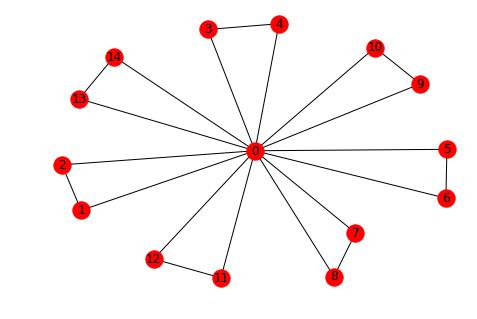

In [3]:
# review
print(seed15)
plot_given_edges(seed15)

In [4]:
# Verify some details
assert len(seed15)*len(seed15) == num_known_zeros(seed15) + num_known_ones(seed15) + num_unknowns(seed15)
assert not(has_unknown_values(seed15))
assert lambda_compatible(seed15)
assert mu_compatible(seed15)
assert meets_adjacency_requirements(seed15, debug=True)
assert graph_is_valid(seed15)

## Adding vertex 15
(NB, as we started numbering at 0, this is our 16th vertex)

wlog (see intro, or consider how the plot below would be equivalent for any alternative choice for second neighbour amongst 3...14), we may assume this is a neighbour of vertices 1 and 3.

In [5]:
%time rep16 = find_valid_supergraphs([seed15], forced_edges=[(1,15), (15,3)])

2020-07-07 14:26:22.976026: Starting with 1 seeds
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
2020-07-07 14:26:22.981013: 1 valid graphs from templates
	1 reps from 1 candidates
2020-07-07 14:26:22.981013: Reduced to 1 representatives
Wall time: 4.99 ms


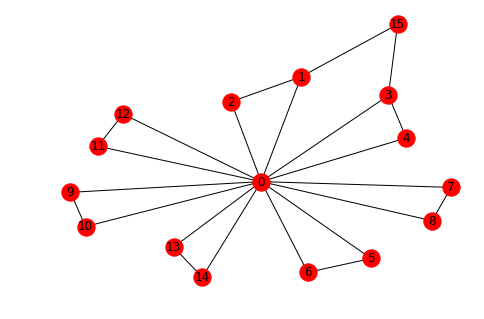

In [6]:
# confirm this is what we expected:
plot_given_edges(rep16[0])

## Adding vertices 16...26
_Note that we no longer make any direct assumptions about the second neighbour j in 3...14; we determine representatives of the possibilities dictated by the lambda, mu conditions._ 

### Vertex 16

We know one of the blades centred at vertex 1; namely 1-0-2-1.

We also have part of another, containing vertex 15.

wlog, let vertex 16 be the other vertex of that blade (_so we force 1-16, and 15-16_)

In [7]:
%time rep17 = find_valid_supergraphs(rep16, forced_edges=[(1,16),(15,16)], verbose=False)

2020-07-07 14:26:23.072767: Starting with 1 seeds
2020-07-07 14:26:23.105714: 11 valid graphs from templates
2020-07-07 14:26:23.106677: Reduced to 2 representatives
Wall time: 33.9 ms


### Vertex 17

Vertex 17 necessarily starts a new blade, so only forcing 1-17

In [8]:
%time rep18 = find_valid_supergraphs(rep17, forced_edges=[(1,17)], verbose=False)

2020-07-07 14:26:23.112660: Starting with 2 seeds
2020-07-07 14:26:23.199428: 20 valid graphs from templates
2020-07-07 14:26:23.202420: Reduced to 3 representatives
Wall time: 89.8 ms


### Vertex 18

However, we can then force vertex 18 to be the other vertex of that blade

In [9]:
%time rep19 = find_valid_supergraphs(rep18, forced_edges=[(1,18),(17,18)], verbose=False)

2020-07-07 14:26:23.208404: Starting with 3 seeds
2020-07-07 14:26:23.336099: 27 valid graphs from templates
2020-07-07 14:26:23.372964: Reduced to 5 representatives
Wall time: 166 ms


### Vertices 19...26

Continue in this fashion until we have all nhbrs of vertex 1, with forced fan pattern 0-2, 15-16, 17-18, 19-20, 21-22, 23-24, 25-26

In [10]:
%time rep20 = find_valid_supergraphs(rep19, forced_edges=[(1,19)], verbose=False)

2020-07-07 14:26:23.379946: Starting with 5 seeds
2020-07-07 14:26:23.639252: 40 valid graphs from templates
2020-07-07 14:26:23.645236: Reduced to 8 representatives
Wall time: 265 ms


In [11]:
%time rep21 = find_valid_supergraphs(rep20, forced_edges=[(1,20), (19,20)], verbose=False)

2020-07-07 14:26:23.651219: Starting with 8 seeds
2020-07-07 14:26:24.049190: 56 valid graphs from templates
2020-07-07 14:26:24.057134: Reduced to 10 representatives
Wall time: 407 ms


In [12]:
%time rep22 = find_valid_supergraphs(rep21, forced_edges=[(1,21)], verbose=False)

2020-07-07 14:26:24.063118: Starting with 10 seeds
2020-07-07 14:26:24.692483: 60 valid graphs from templates
2020-07-07 14:26:24.700413: Reduced to 17 representatives
Wall time: 637 ms


In [13]:
%time rep23 = find_valid_supergraphs(rep22, forced_edges=[(1,22), (21,22)], verbose=False)

2020-07-07 14:26:24.706397: Starting with 17 seeds
2020-07-07 14:26:25.620988: 85 valid graphs from templates
2020-07-07 14:26:25.632918: Reduced to 17 representatives
Wall time: 928 ms


In [14]:
%time rep24 = find_valid_supergraphs(rep23, forced_edges=[(1,23)], verbose=False)

2020-07-07 14:26:25.638902: Starting with 17 seeds
2020-07-07 14:26:26.597373: 68 valid graphs from templates
2020-07-07 14:26:26.607312: Reduced to 26 representatives
Wall time: 968 ms


In [15]:
%time rep25 = find_valid_supergraphs(rep24, forced_edges=[(1,24), (23,24)], verbose=False)

2020-07-07 14:26:26.613295: Starting with 26 seeds
2020-07-07 14:26:27.894908: 78 valid graphs from templates
2020-07-07 14:26:27.906835: Reduced to 19 representatives
Wall time: 1.29 s


In [16]:
%time rep26 = find_valid_supergraphs(rep25, forced_edges=[(1,25)], verbose=False)

2020-07-07 14:26:27.911821: Starting with 19 seeds
2020-07-07 14:26:28.801478: 38 valid graphs from templates
2020-07-07 14:26:28.808423: Reduced to 19 representatives
Wall time: 897 ms


In [17]:
%time rep27 = find_valid_supergraphs(rep26, forced_edges=[(1,26),(25,26)], verbose=False)

2020-07-07 14:26:28.813409: Starting with 19 seeds
2020-07-07 14:26:29.510590: 19 valid graphs from templates
2020-07-07 14:26:29.514534: Reduced to 11 representatives
Wall time: 701 ms


# Review

Up to equivalence, we have 11 possibilities. We first review an arbitrary example, then consider how the others differ.

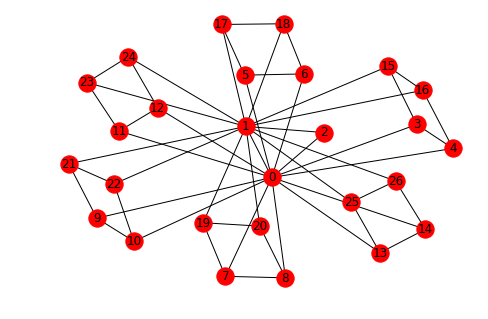

In [18]:
plot_given_edges(rep27[0])

In [19]:
def describe_differences(rep1, rep2):
    order = min(len(rep1),len(rep2))
    for i in range(order):
        for j in range(i, order):
            if rep1[i,j] > rep2[i,j]:
                print('First graph has edge {}-{} absent from second'.format(i,j))
            if rep1[i,j] < rep2[i,j]:
                print('First graph lacks edge {}-{} present in second'.format(i,j))

In [20]:
for i in range(1, 11):
    print('Comparing rep 0 to rep {}'.format(i))
    describe_differences(rep27[0],rep27[i])
    print('\n------\n')

Comparing rep 0 to rep 1
First graph has edge 12-24 absent from second
First graph lacks edge 12-25 present in second
First graph lacks edge 13-24 present in second
First graph has edge 13-25 absent from second

------

Comparing rep 0 to rep 2
First graph has edge 10-22 absent from second
First graph lacks edge 10-23 present in second
First graph lacks edge 11-22 present in second
First graph has edge 11-23 absent from second
First graph has edge 12-24 absent from second
First graph lacks edge 12-25 present in second
First graph lacks edge 13-24 present in second
First graph has edge 13-25 absent from second

------

Comparing rep 0 to rep 3
First graph has edge 8-20 absent from second
First graph lacks edge 8-21 present in second
First graph lacks edge 9-20 present in second
First graph has edge 9-21 absent from second
First graph has edge 12-24 absent from second
First graph lacks edge 12-25 present in second
First graph lacks edge 13-24 present in second
First graph has edge 13-25 

Which edges are consistent across all reps?

In [21]:
for i in range(27):
    for j in range(i,27):
        if min([r[i,j] for r in rep27]) == 1:
            print('Edge {}-{} appears in all representatives'.format(i,j))

Edge 0-1 appears in all representatives
Edge 0-2 appears in all representatives
Edge 0-3 appears in all representatives
Edge 0-4 appears in all representatives
Edge 0-5 appears in all representatives
Edge 0-6 appears in all representatives
Edge 0-7 appears in all representatives
Edge 0-8 appears in all representatives
Edge 0-9 appears in all representatives
Edge 0-10 appears in all representatives
Edge 0-11 appears in all representatives
Edge 0-12 appears in all representatives
Edge 0-13 appears in all representatives
Edge 0-14 appears in all representatives
Edge 1-2 appears in all representatives
Edge 1-15 appears in all representatives
Edge 1-16 appears in all representatives
Edge 1-17 appears in all representatives
Edge 1-18 appears in all representatives
Edge 1-19 appears in all representatives
Edge 1-20 appears in all representatives
Edge 1-21 appears in all representatives
Edge 1-22 appears in all representatives
Edge 1-23 appears in all representatives
Edge 1-24 appears in all r

This is just our assumed numbering of:
* The neighbours of vertex 0
* The neighbours of vertex 1
* The fan structure centred at 0 (1-2, 3-4 etc.)
* Vertex 3 chosen as the second mutual neighbour of vertices 0 and 15 amongst 3...14
* The fan structure centred at 1 (15-16, 17-18 etc.)

So these assumptions do not inevitably force any other edges; various branches arise as each succesive vertex 16..26 is considered.

In [22]:
# Export base example for plotting

In [23]:
G = graph_from_mat(rep27[0])
write_dot(G, "rep27_0.dot")

Note that rep 0 has a particularly pleasing pattern - for each i = 15...26, the neighbour j from 3...14 satisfies i = j + 12 

(i.e. consistent throughout with our choice of vertex 3 as neighbour of vertex 15.)


In [24]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (3, 4), (3, 15), (4, 16), (5, 6), (5, 17), (6, 18), (7, 8), (7, 19), (8, 20), (9, 10), (9, 21), (10, 22), (11, 12), (11, 23), (12, 24), (13, 14), (13, 25), (14, 26), (15, 16), (17, 18), (19, 20), (21, 22), (23, 24), (25, 26)])